In [40]:
%matplotlib inline

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import mlflow

In [46]:
experiment = mlflow.create_experiment(name='Initial testing')

In [48]:
run = mlflow.start_run(experiment_id=experiment)

In [49]:
mlflow.active_run()

<ActiveRun: >

In [61]:
mlflow.log_artifact

<function mlflow.tracking.fluent.log_artifact(local_path: str, artifact_path: Optional[str] = None) -> None>

In [42]:
passengers_data = pd.read_csv("data/train.csv", true_values=["True"], false_values=["False"])

In [63]:
mlflow.log_artifact("data/train.csv")

In [64]:
mlflow.log_artifact("data/test.csv")

In [43]:
passengers_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [50]:
passengers_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [51]:
passengers_data.PassengerId.sample(50)

3060    3301_03
3704    3981_01
7529    8052_01
4758    5076_01
5401    5768_01
6361    6729_01
3683    3959_02
7662    8173_01
4774    5091_01
5212    5560_01
1452    1533_01
1824    1952_01
7607    8129_03
7504    8027_01
2252    2412_01
1514    1606_01
1873    1999_01
1730    1844_01
4186    4466_01
6970    7402_01
2995    3238_01
456     0498_01
3645    3919_01
2740    2943_01
3953    4218_02
2459    2640_01
6513    6873_01
4222    4498_02
3334    3584_01
6392    6753_02
7450    7972_02
6960    7395_01
6078    6422_04
1750    1863_01
8218    8783_02
1497    1590_01
2386    2561_01
2718    2912_01
3644    3917_01
1214    1292_02
1737    1850_01
7086    7544_01
436     0468_01
1368    1440_01
1380    1452_03
2805    3026_01
2744    2944_04
6261    6626_01
2629    2813_01
5117    5466_04
Name: PassengerId, dtype: object

In [52]:
passengers_data.HomePlanet.value_counts(dropna= False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [53]:
passengers_data.HomePlanet.astype("category")

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: category
Categories (3, object): ['Earth', 'Europa', 'Mars']

In [54]:
passengers_data.CryoSleep.value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [55]:
destinations = passengers_data.Destination.value_counts().sort_values(ascending=True)

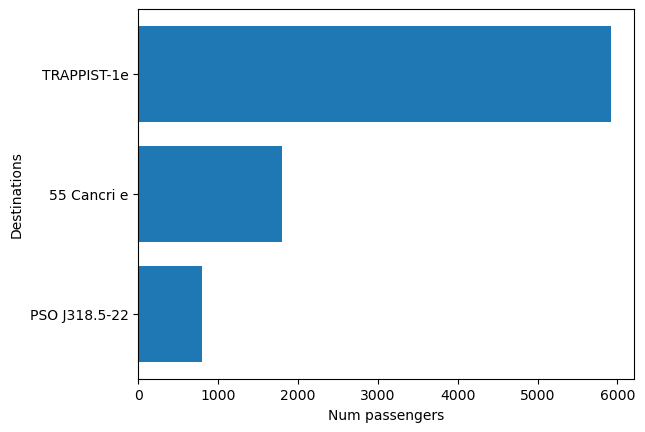

In [56]:
plt.barh(destinations.index, destinations)
plt.xlabel("Num passengers")
plt.ylabel("Destinations")
plt.show()

In [57]:
num_passengers = passengers_data.PassengerId.str.split("_", expand=True)[0].value_counts().value_counts()

<BarContainer object of 8 artists>

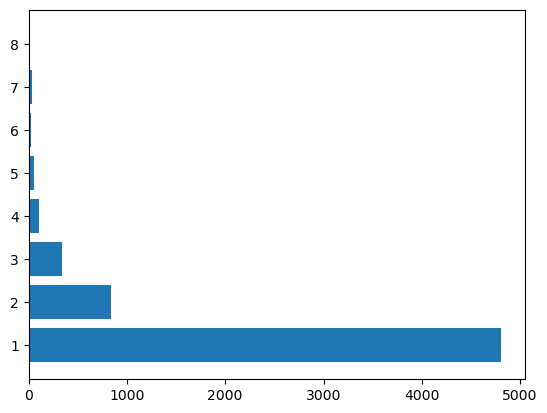

In [58]:
plt.barh(num_passengers.index, num_passengers)

In [59]:
passengers_data.Transported.value_counts(dropna=False)

True     4378
False    4315
Name: Transported, dtype: int64

In [66]:
passenger_attributes = passengers_data.drop(columns=["Transported"]) # X
passenger_labels = passengers_data.Transported # y

In [67]:
passenger_attributes = passenger_attributes.drop(columns=["PassengerId", "Name", "Cabin"])

In [68]:
passenger_attributes = pd.get_dummies(passenger_attributes, drop_first= True)

In [69]:
passenger_attributes = passenger_attributes.dropna()

In [70]:
passenger_labels = passenger_labels.loc[passenger_attributes.index]

In [71]:
model = LogisticRegression()

In [73]:
mlflow.log_param("C", 1)
mlflow.log_param("train_test_split", False)

False

In [74]:
model.fit(passenger_attributes, passenger_labels)

/Users/ivelin.borisov/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
model.score(passenger_attributes, passenger_labels)

0.7896325459317586

In [76]:
test_passenger_data = pd.read_csv("data/test.csv")

In [77]:
test_passenger_attributes = test_passenger_data

test_passenger_attributes = test_passenger_attributes.drop(columns=["PassengerId", "Name", "Cabin"])
test_passenger_attributes = pd.get_dummies(test_passenger_attributes, drop_first= True)
test_passenger_attributes = test_passenger_attributes.dropna()

In [81]:
for train_step in range(100):
    mlflow.log_metric("test_metric", train_step ** 2, step= train_step)

In [78]:
test_passenger_attributes

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,27.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,1,0
4,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4270,43.0,47.0,0.0,3851.0,0.0,0.0,0,1,0,0,1,0
4271,40.0,0.0,865.0,0.0,3.0,0.0,0,0,0,0,1,0
4272,34.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
4273,42.0,0.0,847.0,17.0,10.0,144.0,0,0,0,0,1,0


In [82]:
model.predict(test_passenger_attributes)

array([ True, False,  True, ...,  True, False,  True])

In [83]:
passenger_labels

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 7620, dtype: bool

In [84]:
print(classification_report(passenger_labels, model.predict(passenger_attributes)))

              precision    recall  f1-score   support

       False       0.79      0.78      0.79      3789
        True       0.79      0.80      0.79      3831

    accuracy                           0.79      7620
   macro avg       0.79      0.79      0.79      7620
weighted avg       0.79      0.79      0.79      7620



In [85]:
model.coef_

array([[-1.06465455e-03, -1.38935277e-03,  5.69742305e-04,
         5.88896627e-04, -1.87240066e-03, -1.69122308e-03,
         1.66903368e+00,  5.08021505e-01,  1.35762092e+00,
        -3.37715627e-01, -6.18376734e-01, -1.45087482e-02]])

In [86]:
list(zip(passenger_attributes.columns.tolist(), model.coef_[0,:].tolist()))

[('Age', -0.0010646545499242478),
 ('RoomService', -0.0013893527714261213),
 ('FoodCourt', 0.0005697423053994423),
 ('ShoppingMall', 0.0005888966267575784),
 ('Spa', -0.0018724006634473517),
 ('VRDeck', -0.0016912230757612473),
 ('HomePlanet_Europa', 1.6690336757222897),
 ('HomePlanet_Mars', 0.5080215048972752),
 ('CryoSleep_True', 1.3576209181435117),
 ('Destination_PSO J318.5-22', -0.33771562699065893),
 ('Destination_TRAPPIST-1e', -0.6183767343405171),
 ('VIP_True', -0.014508748207771722)]

In [87]:
mlflow.end_run()